# Math 124 - Programming for Mathematical Applications
Per-Olof Persson, UC Berkeley

## Project 2 - Random Maze

### Description

In this project, you will develop code to generate a random maze and then find a path through it. The project is divided into two main parts: maze generation and pathfinding, both of which will use recursive algorithms.

We'll represent an `n`-by-`n` maze as a grid of cells. A cell is identified by its integer indices `(i,j)`, where `i` is the row (related to the x-coordinate) and `j` is the column (related to the y-coordinate).

The interior walls of the maze are defined by two Boolean matrices:

- `H` (Horizontal): A `n`-by-`n-1` matrix. `H[i,j] = true` means there is a wall between cell `(i,j)` and `(i, j+1)` (an "up" wall from cell i,j).
- `V` (Vertical): A `n-1`-by-`n` matrix. `V[i,j] = true` means there is a wall between cell `(i,j)` and `(i+1, j)` (a "right" wall from cell i,j).

Here is an example for `n=6`:

In [1]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];

The following helper functions are provided to visualize the maze and its cell indices.

In [2]:
using Plots, Random

"""
    plot_maze(H, V)

Draws a maze defined by the horizontal (H) and vertical (V) wall matrices.
This function modifies the current active plot.
"""
function plot_maze(H, V)
    n = size(H, 1)
    # Start with a blank plot and draw the outer boundary
    plot(aspect_ratio=:equal, border=:none, legend=false, framestyle=:none)
    plot!([0,n,n,0,0], [0,0,n,n,0], linecolor=:black, linewidth=2)
    
    # Draw vertical walls
    for i in 1:size(V,1), j in 1:size(V,2)
        if V[i,j]
            plot!([i,i], [j-1,j], linecolor=:black, linewidth=2)
        end
    end

    # Draw horizontal walls
    for i in 1:size(H,1), j in 1:size(H,2)
        if H[i,j]
            plot!([i-1,i], [j,j], linecolor=:black, linewidth=2)
        end
    end
end

"""
    plot_cell_indices(n)

Annotates the maze plot with the (i,j) index of each cell.
"""
function plot_cell_indices(n)
    for i in 1:n, j in 1:n
        annotate!(i - 0.5, j - 0.5, text("($i,$j)", :gray, 8))
    end
end

plot_cell_indices

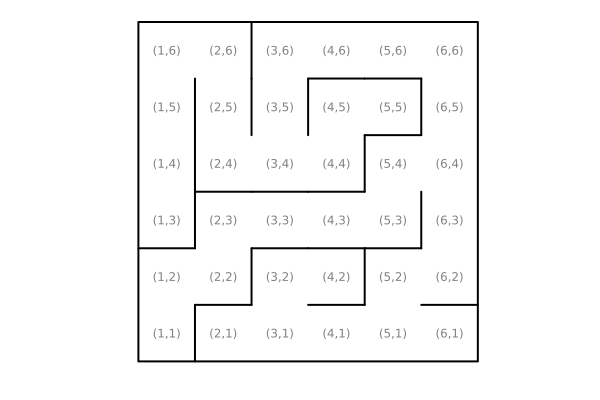

In [3]:
# Example of plotting the maze with indices
plot_maze(H, V)
plot_cell_indices(size(H,1))
plot!()  # To display the plot

A path through the maze can be represented by two vectors, `path_i` and `path_j`, storing the sequence of cell indices. For our example, a path from `(6,1)` to `(1,6)` is:

In [4]:
path_i = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
path_j = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];

This path can be overlaid on the maze plot as a red line.

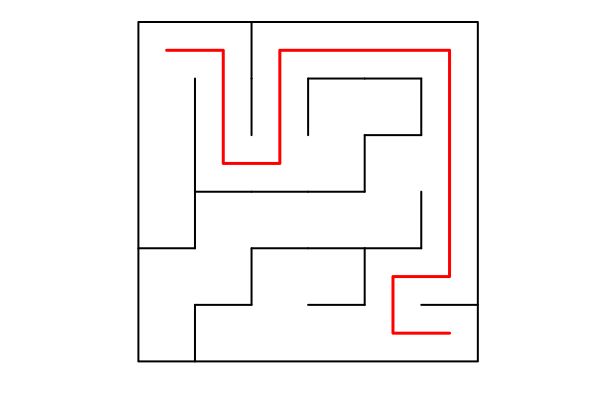

In [5]:
plot_maze(H, V)
plot!(path_i .- 0.5, path_j .- 0.5, linecolor=:red, linewidth=3)

### Problem 1 - Generate a Random Maze

Write a function with the signature
```julia
H, V = make_maze(n)
```
which produces a random `n`-by-`n` maze. The algorithm you'll implement is a **recursive backtracker**, a form of depth-first search that results in a perfect maze (a maze with no loops and a unique path between any two cells). 

**Algorithm:**
1.  Initialize `H` and `V` to be entirely `true` (all walls are up).
2.  Create a `visited` matrix of size `n`-by-`n`, initialized to `false`.
3.  Implement a recursive inner function, `carve_path_from(i, j)`, which does the following:
    - (a). Mark the current cell `(i,j)` as visited.
    - (b). Loop through the four neighboring directions (Up, Down, Left, Right) in a **random order**.
    - (c). For each neighbor, check if it is within the grid boundaries and has not yet been visited. 
    - (d). If both conditions are met, remove the wall between the current cell and that neighbor, and then make a recursive call to `carve_path_from` for the neighbor.
4.  Start the process by calling `carve_path_from(1, 1)`.
5.  Return the final `H` and `V` wall matrices.

### Problem 2 - Find a Path

Next, write a function with the signature
```julia
path_i, path_j = find_path(H, V)
```
which finds a path in the maze from the starting cell `(1,n)` to the ending cell `(n,1)`. This is another application of recursive depth-first search.

**Algorithm:**
1.  Create a `visited` matrix to avoid cycles.
2.  Initialize empty vectors `path_i` and `path_j` to store the final path.
3.  Create a recursive function `search_from(i,j)` that returns `true` if a path to the end is found from `(i,j)`, and `false` otherwise.
4.  - (a). Mark `(i,j)` as visited.
    - (b). **Base Case:** If `(i,j)` is the target cell `(n,1)`, a path has been found! Add `(i,j)` to the path vectors and return `true`.
    - (c). **Recursive Step:** Explore the unvisited neighbors of `(i,j)` that are not blocked by a wall.
    - (d). If a recursive call to a neighbor returns `true`, it means that neighbor is on the correct path. Therefore, the current cell `(i,j)` is also on the path. Add `(i,j)` to the path vectors and return `true`.
    - (e). If you explore all neighbors and none lead to the target, this cell is a dead end. Return `false`.
    
6.  Start the search by calling `search_from(1,n)`.
7.  Return the `path_i` and `path_j` vectors.

### Problem 3 - Putting It All Together

Finally, run your functions to generate a large random maze and display its solution path. 🗺️